In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/alexis/Downloads/Ex_Files_Data_Visualization_with_Matplotlib_and_Seaborn/Exercise Files/Data Viz with Matplotlib & Seaborn/Course Assignment Notebooks


In [255]:
path = "../Data/coffee/total-production.csv"

coffee_production = pd.read_csv(path).T

coffee_production.columns = coffee_production.iloc[0]

coffee_production = coffee_production.drop("total_production")


In [256]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [257]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

# Top 10 Producers

In [259]:
top10_producers = coffee_production.sum().sort_values(ascending = False).iloc[:10]

top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

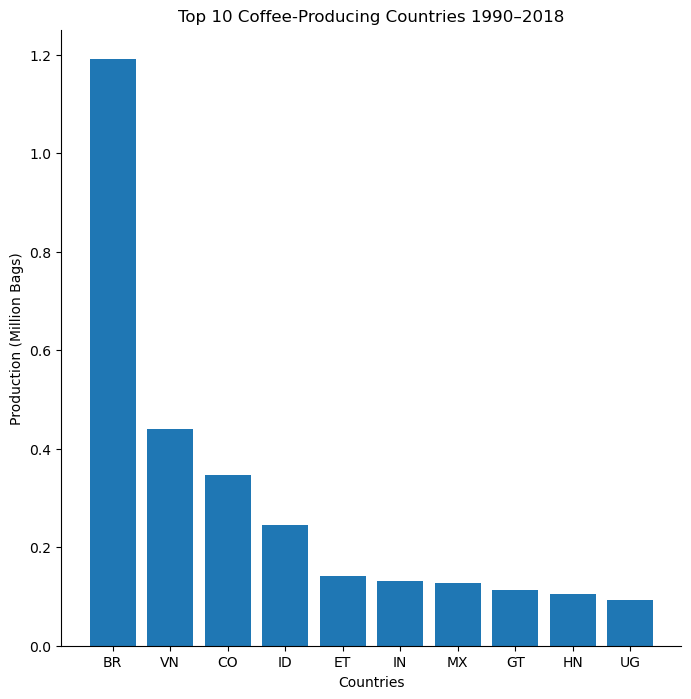

In [260]:
fig, ax = plt.subplots(figsize = (8,8))
ax.bar(x=top10_producers.index, height=top10_producers/1000000)
positions = list(range(10))
labels = ['BR', 'VN', 'CO', 'ID', 'ET', 'IN', 'MX', 'GT', 'HN', 'UG']
ax.set_title('Top 10 Coffee-Producing Countries 1990–2018')
ax.set_xlabel('Countries')
ax.set_ylabel('Production (Million Bags)')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Top 5 Over Time

In [262]:
top5 = coffee_production.loc[:,['Brazil','Viet Nam', 'Colombia', 'Indonesia','Ethiopia']]
top5.index = top5.index.astype('datetime64[ns]')
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


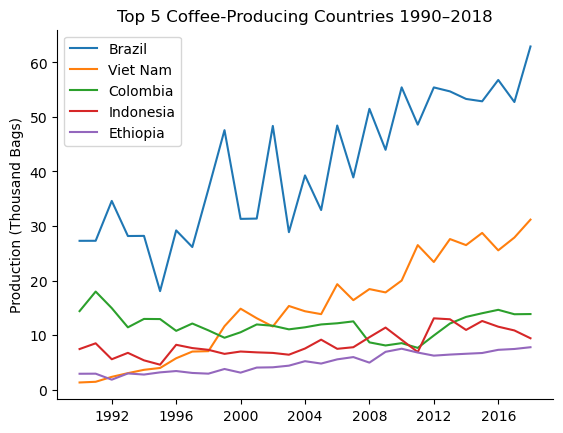

In [263]:
fig, ax = plt.subplots()
ax.set_title('Top 5 Coffee-Producing Countries 1990–2018')
ax.set_ylabel('Production (Thousand Bags)')
ax.plot(top5.index, coffee_production['Brazil']/1000, label = 'Brazil')
ax.plot(top5.index, coffee_production['Viet Nam']/1000, label = 'Viet Nam')
ax.plot(top5.index, coffee_production['Colombia']/1000, label = 'Colombia')
ax.plot(top5.index, coffee_production['Indonesia']/1000, label = 'Indonesia')
ax.plot(top5.index, coffee_production['Ethiopia']/1000, label = 'Ethiopia')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
plt.show()

# Global production versus Brazil's production over time

In [265]:
brazil_vs_others.index = pd.to_datetime(brazil_vs_others.index, errors='coerce')

brazil_vs_others["Brazil"] = pd.to_numeric(brazil_vs_others["Brazil"], errors='coerce')
brazil_vs_others["rest_of_world"] = pd.to_numeric(brazil_vs_others["rest_of_world"], errors='coerce')

brazil_vs_others = brazil_vs_others.fillna(0)
brazil_vs_others

total_production,Brazil,rest_of_world
1990-01-01,27285.6286,105831.7400
1991-01-01,27293.4934,117110.2770
1992-01-01,34603.3542,103163.1160
1993-01-01,28166.9786,103042.3560
1994-01-01,28192.0470,105516.0770
1995-01-01,18060.2022,113867.6570
1996-01-01,29196.7430,120052.3490
1997-01-01,26148.0040,117647.3100
1998-01-01,36760.8533,116119.3556
1999-01-01,47577.8065,136127.7035


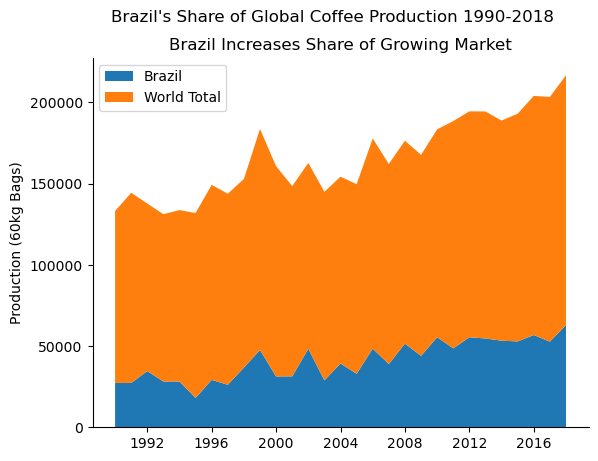

In [266]:
fig, ax = plt.subplots()
ax.stackplot(
    brazil_vs_others.index, 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases Share of Growing Market")
ax.set_ylabel("Production (60kg Bags)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc="upper left")
plt.show()

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

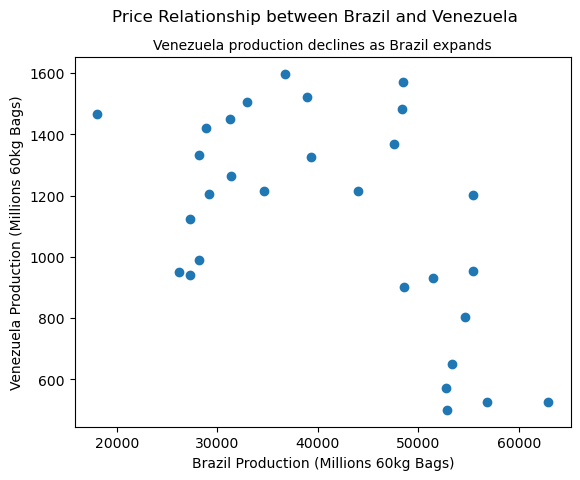

In [268]:
fig, ax = plt.subplots()
ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Venezuela']
)
fig.suptitle('Price Relationship between Brazil and Venezuela')
ax.set_title('Venezuela production declines as Brazil expands', fontsize = 10)
ax.set_xlabel('Brazil Production (Millions 60kg Bags)')
ax.set_ylabel('Venezuela Production (Millions 60kg Bags)')
plt.show()

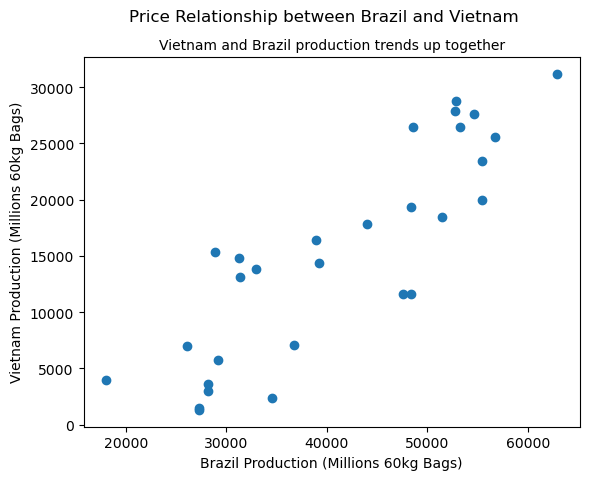

In [269]:
fig, ax = plt.subplots()
ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Viet Nam']
)
fig.suptitle('Price Relationship between Brazil and Vietnam')
ax.set_title('Vietnam and Brazil production trends up together', fontsize=10)
ax.set_xlabel('Brazil Production (Millions 60kg Bags)')
ax.set_ylabel('Vietnam Production (Millions 60kg Bags)')
plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [271]:
coffee_production['Rest of World'] = coffee_production.drop(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], axis=1).sum(axis=1)
coffee_production_top5_2018 = coffee_production.loc['2018', ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest of World']]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: object

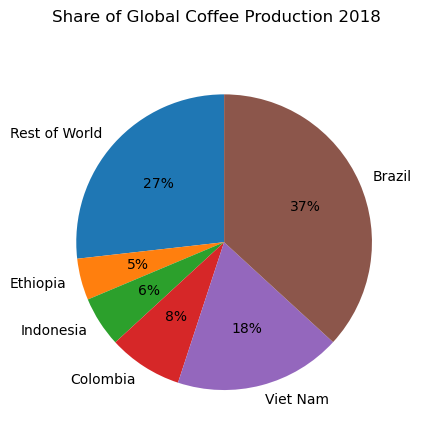

In [272]:
fig, ax = plt.subplots()

ax.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2018")
plt.show()

In [273]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,105831.74
1991,27293.4934,117110.277
1992,34603.3542,103163.116
1993,28166.9786,103042.356
1994,28192.0470,105516.077
1995,18060.2022,113867.657
1996,29196.7430,120052.349
1997,26148.0040,117647.31
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


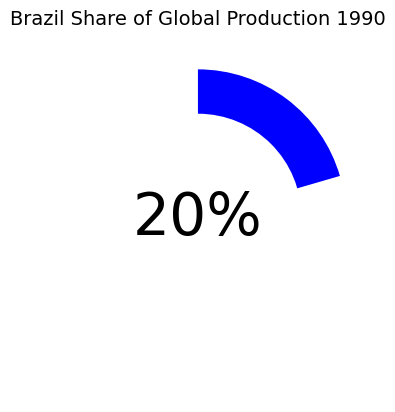

In [274]:
fig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

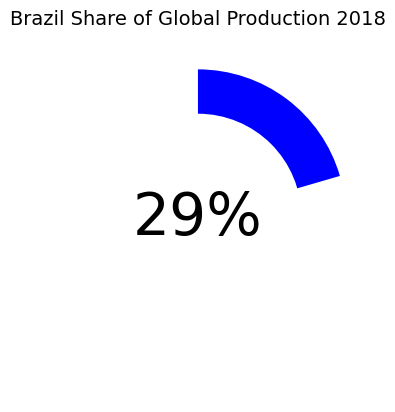

In [275]:
ig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)

plt.show()